In [270]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

Імпортування даних

In [271]:
path = 'D:\\uni\\2курс\ПЗМН\ML_labs\lin_reg_task\survey_results_public.csv'
dataset = pd.read_csv(path)
dataset.head()

,ResponseId,Q120,MainBranch,Age,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,ProfessionalTech,Industry,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,I agree,None of these,18-24 years old,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I agree,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,Hobby;Contribute to open-source projects;Bootstrapping a business;Professional development or self-paced learning from online courses,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Books / Physical media;Colleague;Friend or family member;Hackathons (virtual or in-person);Online Courses or Certification;On the job training;Other online resources (e.g., videos, blogs, forum);School (i.e., University, College, etc)","Formal documentation provided by the owner of the tech;Blogs with tips and tricks;Books;Recorded coding sessions;How-to videos;Video-based Online Courses;Written-based Online Courses;Auditory material (e.g., podcasts);Online challenges (e.g., daily or weekly coding challenges);Written Tutorials;Click to write Choice 20;Stack Overflow",...,1-2 times a week,10+ times a week,Never,15-30 minutes a day,15-30 minutes a day,DevOps function;Microservices;Automated testing;Observability tools,"Information Services, IT, Software Development, or other Technology",Appropriate in length,Easy,285000.0
2,3,I agree,I am a developer by profession,45-54 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby;Professional development or self-paced learning from online courses,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Books / Physical media;Colleague;On the job training;Other online resources (e.g., videos, blogs, forum);School (i.e., University, College, etc)","Formal documentation provided by the owner of the tech;Blogs with tips and tricks;How-to videos;Online challenges (e.g., daily or weekly coding challenges);Written Tutorials;Click to write Choice 20;Stack Overflow",...,6-10 times a week,6-10 times a week,3-5 times a week,30-60 minutes a day,30-60 minutes a day,DevOps function;Microservices;Automated testing;Observability tools;Innersource initiative;Developer portal or other central places to find tools/services;Continuous integration (CI) and (more often) continuous delivery,"Information Services, IT, Software Development, or other Technology",Appropriate in length,Easy,250000.0
3,4,I agree,I am a developer by profession,25-34 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Colleague;Friend or family member;Other online resources (e.g., videos, blogs, forum);School (i.e., University, College, etc)","Formal documentation provided by the owner of the tech;Blogs with tips and tricks;Auditory material (e.g., podcasts);Written Tutorials;Stack Overflow;Interactive tutorial",...,1-2 times a week,10+ times a week,1-2 times a week,15-30 minutes a day,30-60 minutes a day,Automated testing;Continuous integration (CI) and (more often) continuous delivery,NaN,Appropriate in length,Easy,156000.0
4,5,I agree,I am a developer by profession,25-34 years old,"Employed, full-time;Independent contractor, freelancer, or self-employed",Remote,Hobby;Contribute to open-source projects;Professional development or self-paced learning from online courses,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Books / Physical media;Online Courses or Certification;Other online resources (e.g., videos, blogs, forum);School (i.e., University, College, etc)","Formal documentation provided by the owner of the tech;Blogs with tips and tricks;Books;How-to videos;Video-based Online Courses;Online challenges (e.g., daily or weekly coding challenges);Written Tutorials;Click to write Choice 20;Interactive tutorial;Certification videos",...,1-2 times a week,1-2 times a week,3-5 times a week,60-120 minutes a day,30-60 minutes a day,Microser

In [272]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89184 entries, 0 to 89183
Data columns (total 84 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   ResponseId                           89184 non-null  int64  
 1   Q120                                 89184 non-null  object 
 2   MainBranch                           89184 non-null  object 
 3   Age                                  89184 non-null  object 
 4   Employment                           87898 non-null  object 
 5   RemoteWork                           73810 non-null  object 
 6   CodingActivities                     73764 non-null  object 
 7   EdLevel                              87973 non-null  object 
 8   LearnCode                            87663 non-null  object 
 9   LearnCodeOnline                      70084 non-null  object 
 10  LearnCodeCoursesCert                 37076 non-null  object 
 11  YearsCode                   

Перевірка на NaN

In [273]:
dataset.isna().sum()

ResponseId                 0
Q120                       0
MainBranch                 0
Age                        0
Employment              1286
                       ...  
ProfessionalTech       47401
Industry               52410
SurveyLength            2699
SurveyEase              2630
ConvertedCompYearly    41165
Length: 84, dtype: int64

Створення окремого DataFrame, який я використовуватиму

In [274]:
df = dataset[['ResponseId', 'RemoteWork', 'DevType', 'EdLevel', 'LanguageHaveWorkedWith', 'WorkExp', 'Country', 'ConvertedCompYearly']]
df = df.dropna()
df['EdLevel'] = df['EdLevel'].astype('category')
df.rename({'ConvertedCompYearly': 'Salary'}, axis=1, inplace=True)
df.head()

,ResponseId,RemoteWork,DevType,EdLevel,LanguageHaveWorkedWith,WorkExp,Country,Salary
1,2,Remote,"Senior Executive (C-Suite, VP, etc.)","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",HTML/CSS;JavaScript;Python,10.0,United States of America,285000.0
2,3,"Hybrid (some remote, some in-person)","Developer, back-end","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Bash/Shell (all shells);Go,23.0,United States of America,250000.0
3,4,"Hybrid (some remote, some in-person)","Developer, front-end","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Bash/Shell (all shells);HTML/CSS;JavaScript;PHP;Ruby;SQL;TypeScript,7.0,United States of America,156000.0
4,5,Remote,"Developer, full-stack","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",HTML/CSS;JavaScript;TypeScript,6.0,Philippines,23456.0
5,6,Remote,"Developer, back-end",Some college/university study without earning a degree,Bash/Shell (all shells);HTML/CSS;JavaScript;Ruby;SQL;TypeScript,22.0,United Kingdom of Great Britain and Northern Ireland,96828.0


In [275]:
df.describe()

,ResponseId,WorkExp,Salary
count,32554.000000,32554.000000,3.255400e+04
mean,41755.020213,11.435246,9.592970e+04
std,24808.349384,8.813607,4.339312e+05
min,2.000000,0.000000,1.000000e+00
25%,20765.000000,5.000000,4.283600e+04
50%,40421.500000,9.000000,7.448300e+04
75%,62100.750000,16.000000,1.200000e+05
max,89172.000000,50.000000,7.435143e+07


Створенння списку з мовами

In [276]:
unique_languages = set(x.strip() for my_list in df['LanguageHaveWorkedWith'].dropna() for x in my_list.split(';'))
unique_languages

{'APL',
 'Ada',
 'Apex',
 'Assembly',
 'Bash/Shell (all shells)',
 'C',
 'C#',
 'C++',
 'Clojure',
 'Cobol',
 'Crystal',
 'Dart',
 'Delphi',
 'Elixir',
 'Erlang',
 'F#',
 'Flow',
 'Fortran',
 'GDScript',
 'Go',
 'Groovy',
 'HTML/CSS',
 'Haskell',
 'Java',
 'JavaScript',
 'Julia',
 'Kotlin',
 'Lisp',
 'Lua',
 'MATLAB',
 'Nim',
 'OCaml',
 'Objective-C',
 'PHP',
 'Perl',
 'PowerShell',
 'Prolog',
 'Python',
 'R',
 'Raku',
 'Ruby',
 'Rust',
 'SAS',
 'SQL',
 'Scala',
 'Solidity',
 'Swift',
 'TypeScript',
 'VBA',
 'Visual Basic (.Net)',
 'Zig'}

Очищення даних від винятків у заробітній платі

In [277]:
lim2 = np.abs((df.Salary - df.Salary.mean()) / df.Salary.std(ddof=0)) < 3
df = df.where(lim2, np.nan)
df = df.dropna()
df.describe()

,ResponseId,WorkExp,Salary
count,32536.000000,32536.000000,3.253600e+04
mean,41753.221877,11.431983,9.160827e+04
std,24807.526894,8.809246,7.986218e+04
min,2.000000,0.000000,1.000000e+00
25%,20763.250000,5.000000,4.283600e+04
50%,40420.500000,9.000000,7.448300e+04
75%,62100.250000,16.000000,1.200000e+05
max,89172.000000,50.000000,1.300000e+06


In [278]:
df.isna().sum()

ResponseId                0
RemoteWork                0
DevType                   0
EdLevel                   0
LanguageHaveWorkedWith    0
WorkExp                   0
Country                   0
Salary                    0
dtype: int64

Відокремлення заробітньої плати по знанням мов у новий Dataframe

In [279]:
df_sal = df.loc[:, ['LanguageHaveWorkedWith', 'Salary']]
data_for_langue = pd.Series([[] for _ in range(len(unique_languages))], index=unique_languages)

for i in range(df_sal.shape[0]-1):
    curr_row = df_sal.iloc[i]
    for j in unique_languages:
        if j in curr_row['LanguageHaveWorkedWith']:
            data_for_langue.at[j].append(curr_row['Salary'])
        else:
            data_for_langue.at[j].append(pd.NA)

salary_per_langue = data_for_langue.to_frame(name="0")
salary_per_langue = salary_per_langue['0'].apply(pd.Series)
salary_per_langue["mean"] = salary_per_langue.mean(axis=1, skipna=True)
salary_per_langue["Language"] = [i for i in unique_languages]
salary_per_langue.T.head()


,C,Ruby,TypeScript,Kotlin,Visual Basic (.Net),Prolog,SAS,APL,Elixir,JavaScript,...,PowerShell,Clojure,Delphi,Nim,SQL,Dart,GDScript,Scala,Assembly,Cobol
0,285000.0,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,285000.0,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
1,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
2,156000.0,156000.0,156000.0,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,156000.0,...,<NA>,<NA>,<NA>,<NA>,156000.0,<NA>,<NA>,<NA>,<NA>,<NA>
3,23456.0,<NA>,23456.0,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,23456.0,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
4,96828.0,96828.0,96828.0,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,96828.0,...,<NA>,<NA>,<NA>,<NA>,96828.0,<NA>,<NA>,<NA>,<NA>,<NA>


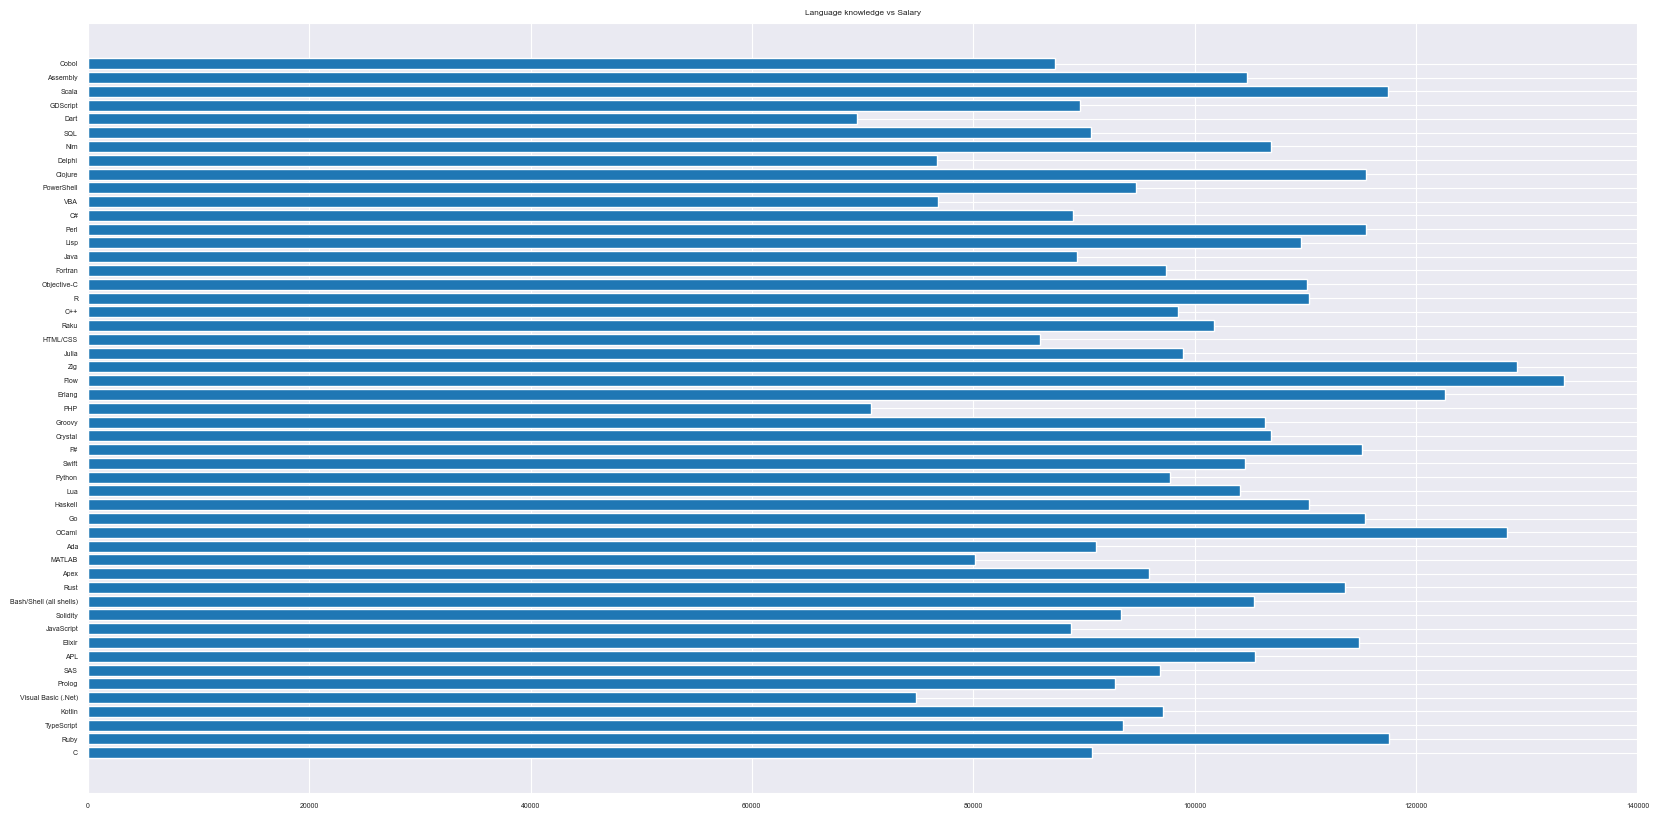

In [280]:
plt.rcParams['figure.figsize'] = [20, 10]
plt.rcParams.update({'font.size': 5})
plt.barh(y=salary_per_langue["Language"], width=salary_per_langue["mean"])
plt.title('Language knowledge vs Salary')
plt.show()

In [281]:
df2 = salary_per_langue.loc[["Python", "C++", "Java"]]
df2.T.loc['mean'].sort_values(ascending=False)

C++        98476.87697
Python    97798.670298
Java      89357.771126
Name: mean, dtype: object

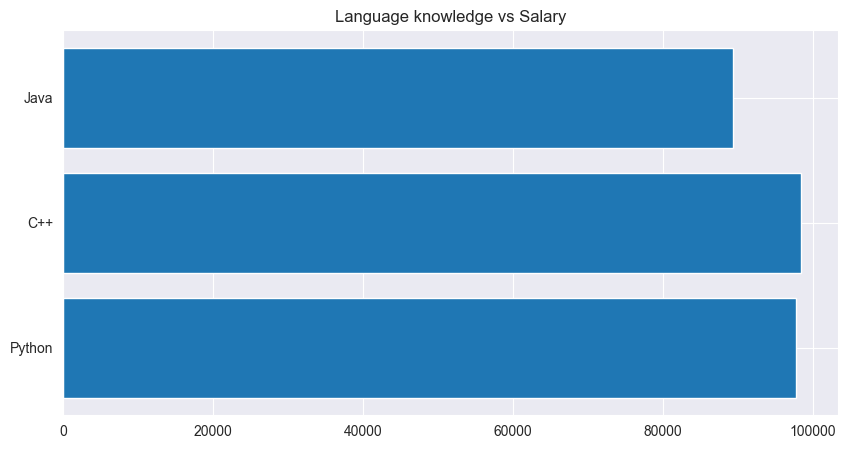

In [282]:
plt.rcParams['figure.figsize'] = [10, 5]
plt.rcParams.update({'font.size': 10})
plt.barh(y=df2["Language"], width=df2["mean"])
plt.title('Language knowledge vs Salary')
plt.show()

Групування заробітної плати за рівнем освіти у Series

In [283]:
df_ed_mean = df.loc[:, ['EdLevel', 'Salary']]
lim1 = np.abs((df_ed_mean.Salary - df_ed_mean.Salary.mean()) / df_ed_mean.Salary.std(ddof=0)) < 3
df_ed_mean = df_ed_mean.where(lim1, np.nan)
df_ed_mean = df_ed_mean.dropna()

In [284]:
df_ed_mean = df_ed_mean.groupby('EdLevel', observed=True)['Salary'].mean()
df_ed_mean

EdLevel
Associate degree (A.A., A.S., etc.)                                                   84546.605239
Bachelor’s degree (B.A., B.S., B.Eng., etc.)                                          88294.726026
Master’s degree (M.A., M.S., M.Eng., MBA, etc.)                                       86589.443875
Primary/elementary school                                                             75631.992188
Professional degree (JD, MD, Ph.D, Ed.D, etc.)                                        91914.548458
Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)    66857.763359
Some college/university study without earning a degree                                82010.147511
Something else                                                                        64578.934985
Name: Salary, dtype: float64

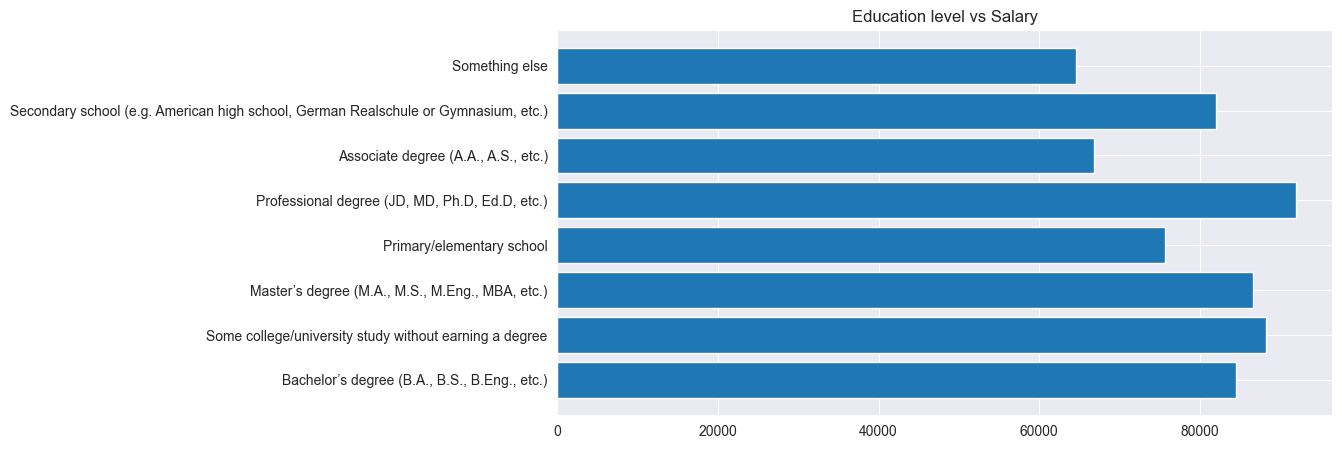

In [285]:
plt.rcParams.update({'font.size': 10})
plt.barh(y=df['EdLevel'].unique(), width=df_ed_mean)
plt.title('Education level vs Salary')
plt.show()

In [286]:
def ToFactor(org_df, new_df, col):
    labels, _ = pd.factorize(org_df[col])
    new_df.loc[:,[col]] = labels

df_mod =df[['WorkExp', 'Salary']]
ToFactor(df, df_mod, "RemoteWork")
ToFactor(df, df_mod, "DevType")
ToFactor(df, df_mod, "EdLevel")
ToFactor(df, df_mod, "Country")

# labels, _ = pd.factorize(df_mod['RemoteWork'])
# df_ed["RemoteWork"] = labels
# labels, _ = pd.factorize(df_mod['DevType'])
# df_ed["DevType"] = labels
# labels, _ = pd.factorize(df_mod['EdLevel'])
# df_ed["Edlevel"] = labels
# labels, _ = pd.factorize(df_mod['Country'])
# df_ed["Country"] = labels

In [287]:
df_mod.dtypes

WorkExp       float64
Salary        float64
RemoteWork      int64
DevType         int64
EdLevel         int64
Country         int64
dtype: object

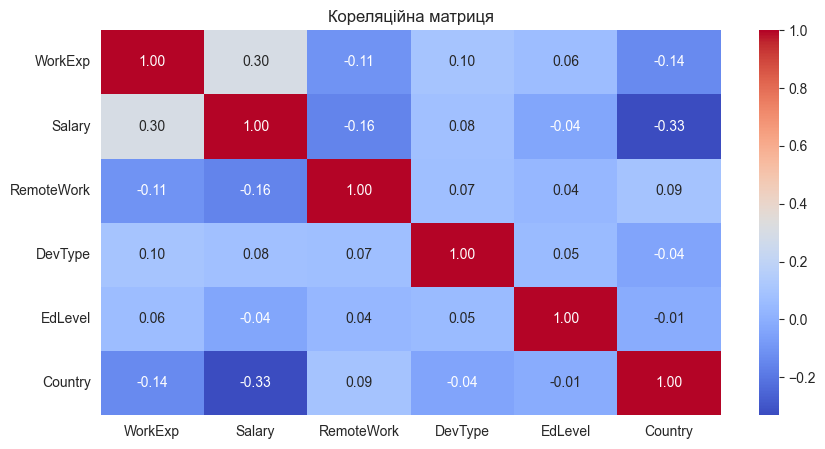

In [288]:
corr_matrix = df_mod.corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Кореляційна матриця")
plt.show()

blabla bla

In [289]:
def ShowPlot(df, x_col, y_col, w=10, h=5):
    df.loc[:, [x_col]] = df.loc[:, [x_col]].astype('category')
    col_mean = df.groupby(x_col, observed=True)[y_col].mean()

    plt.rcParams['figure.figsize'] = [w, h]
    plt.barh(y=df[x_col].unique(), width=col_mean)
    plt.title(f'{x_col} vs {y_col}')
    plt.show()

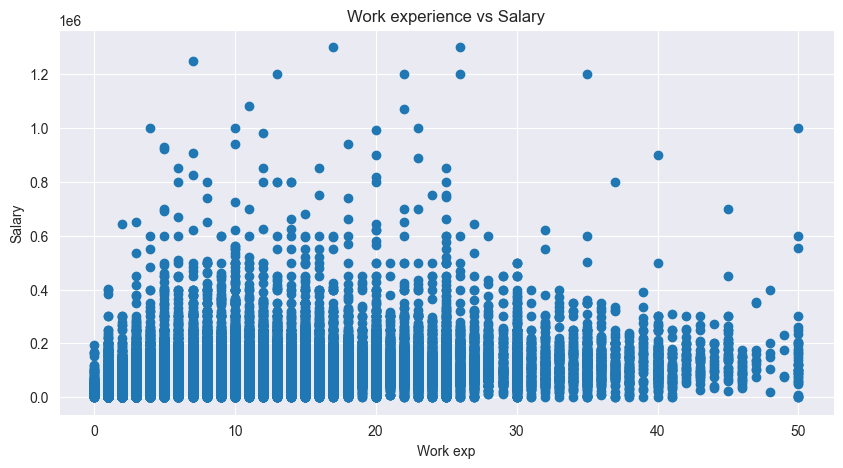

In [290]:
plt.rcParams.update({'font.size': 10})
plt.scatter(x=df_mod['WorkExp'], y=df_mod['Salary'])
plt.title('Work experience vs Salary')
plt.xlabel("Work exp")
plt.ylabel("Salary")
plt.show()

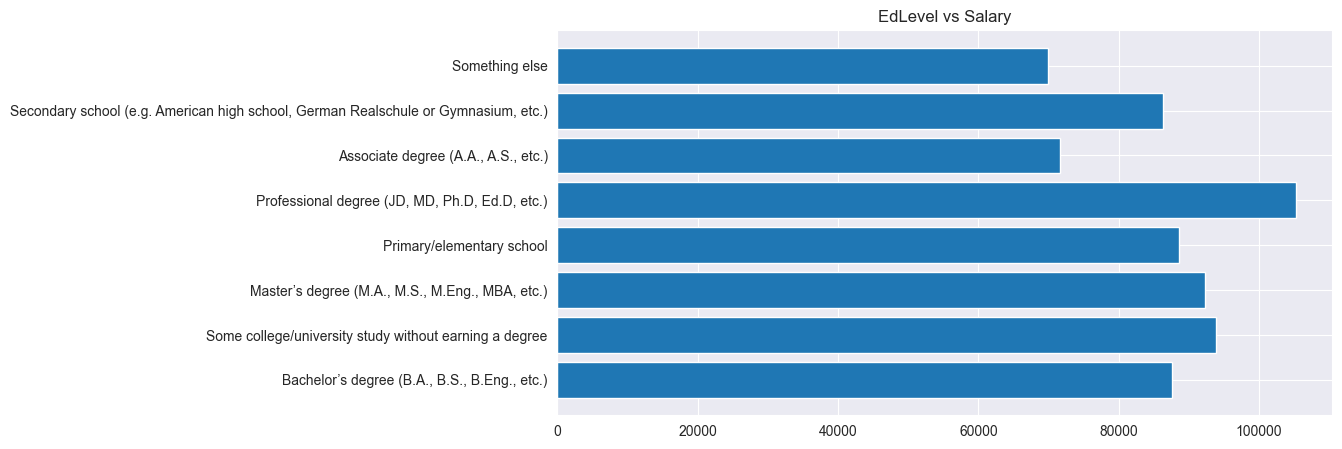

In [291]:
ShowPlot(df, 'EdLevel', 'Salary')

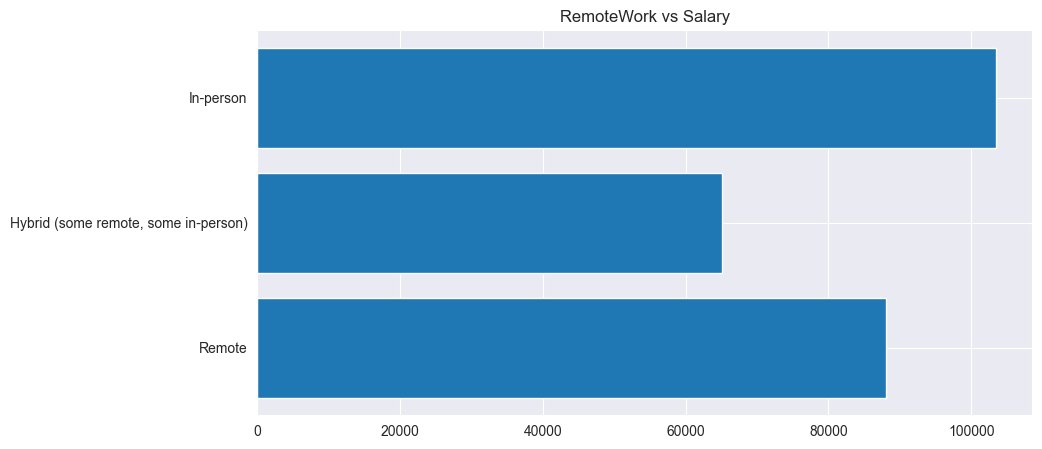

In [292]:
ShowPlot(df, 'RemoteWork', 'Salary')

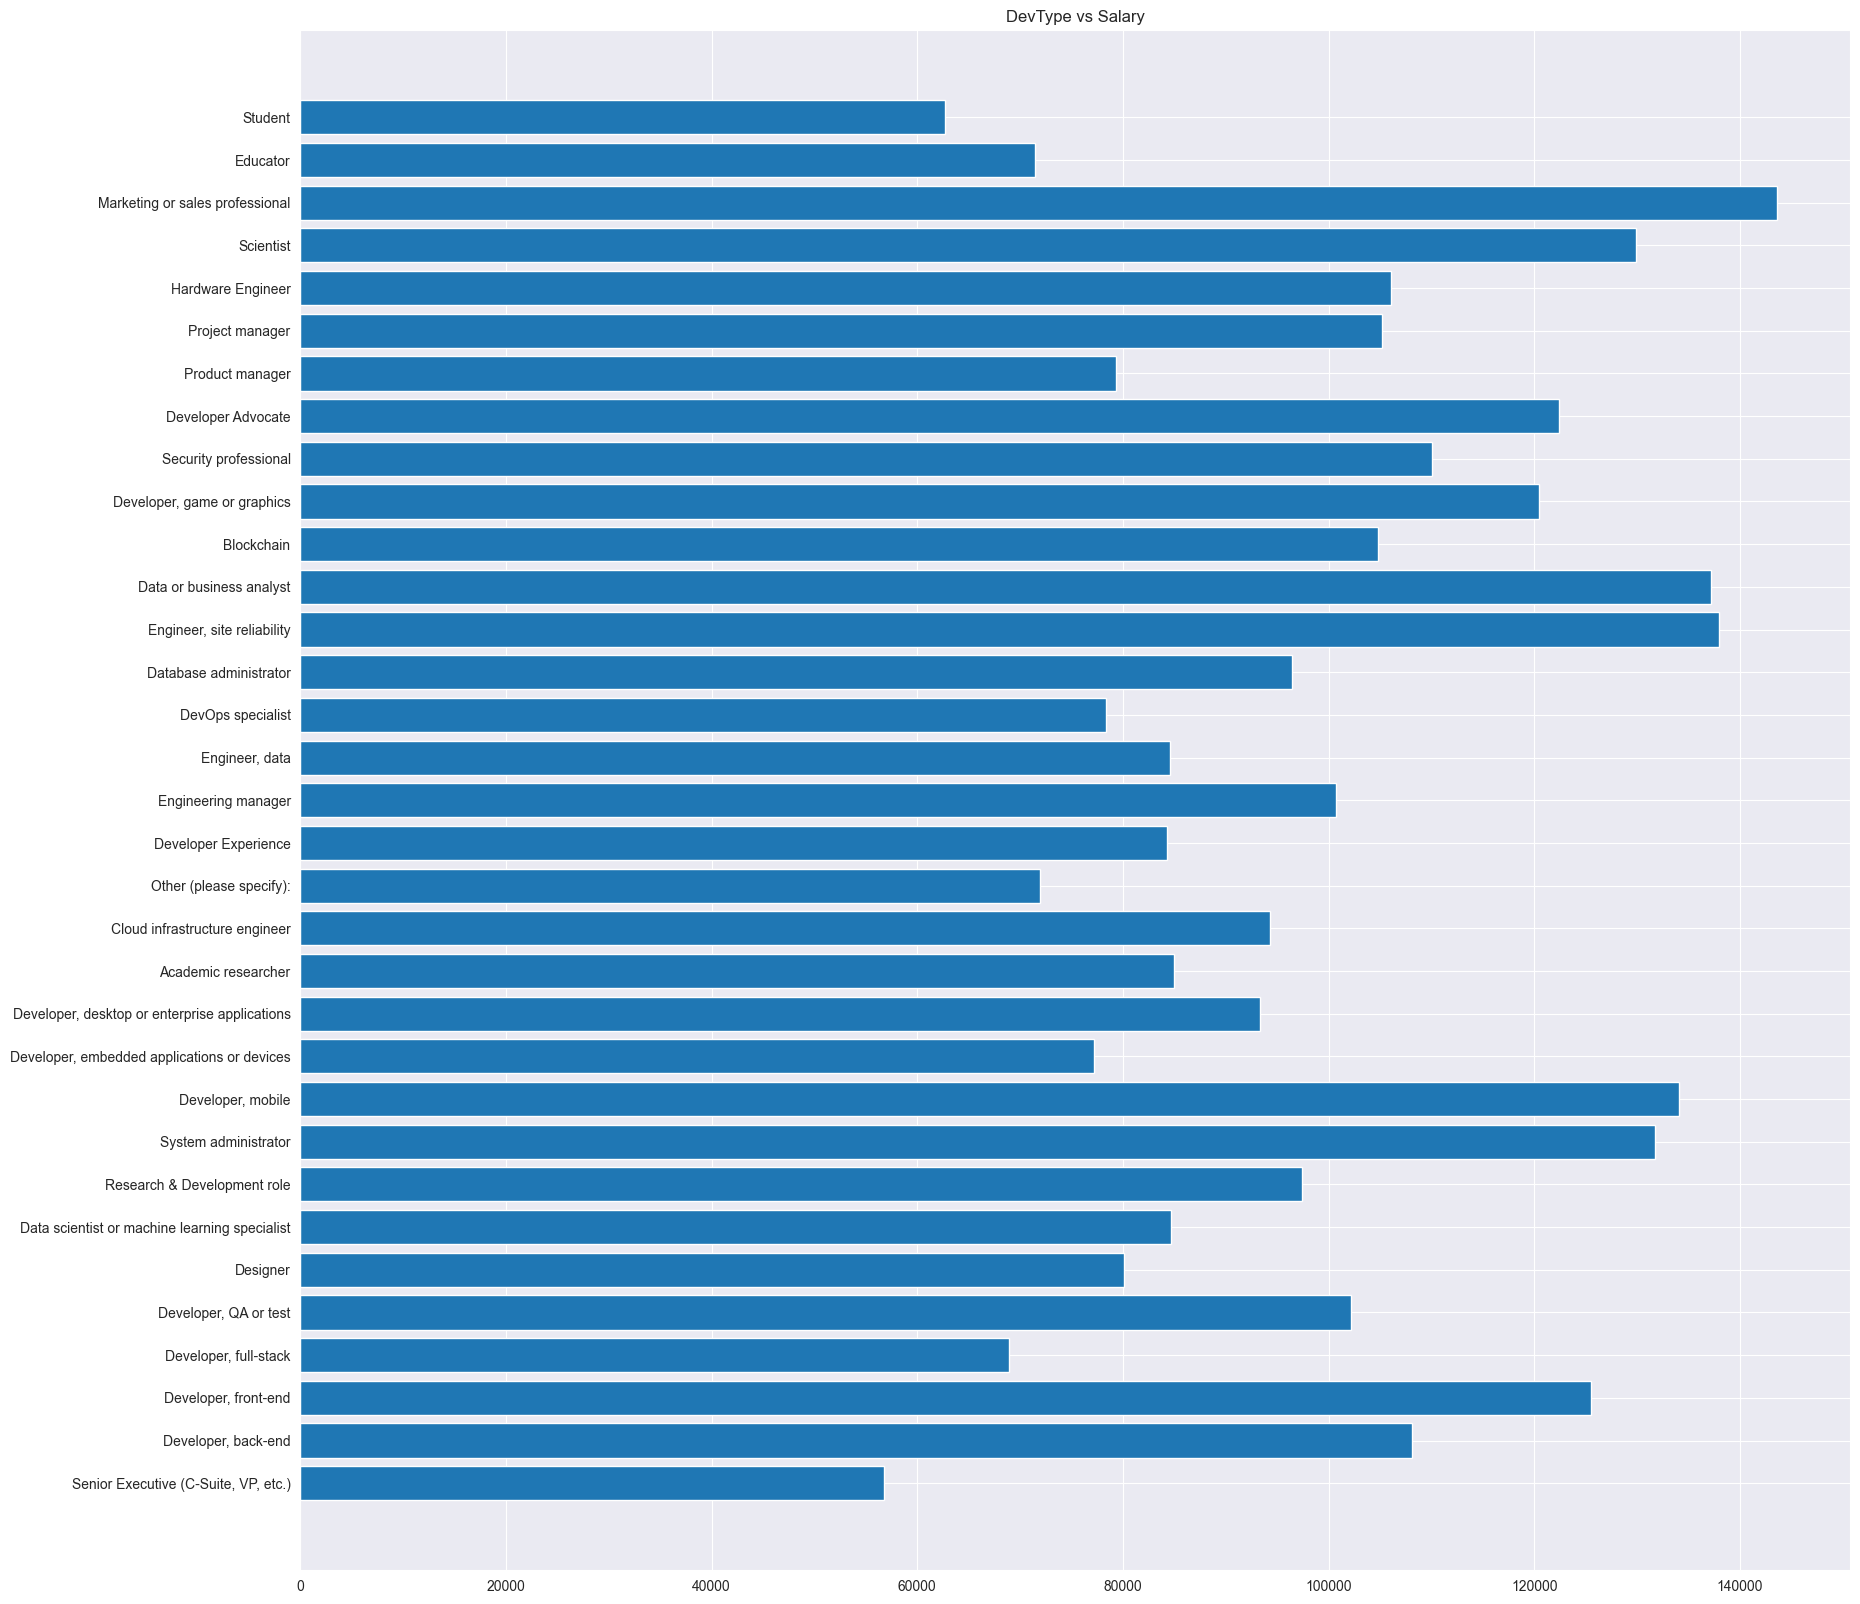

In [293]:
ShowPlot(df, 'DevType', 'Salary', 20, 20)

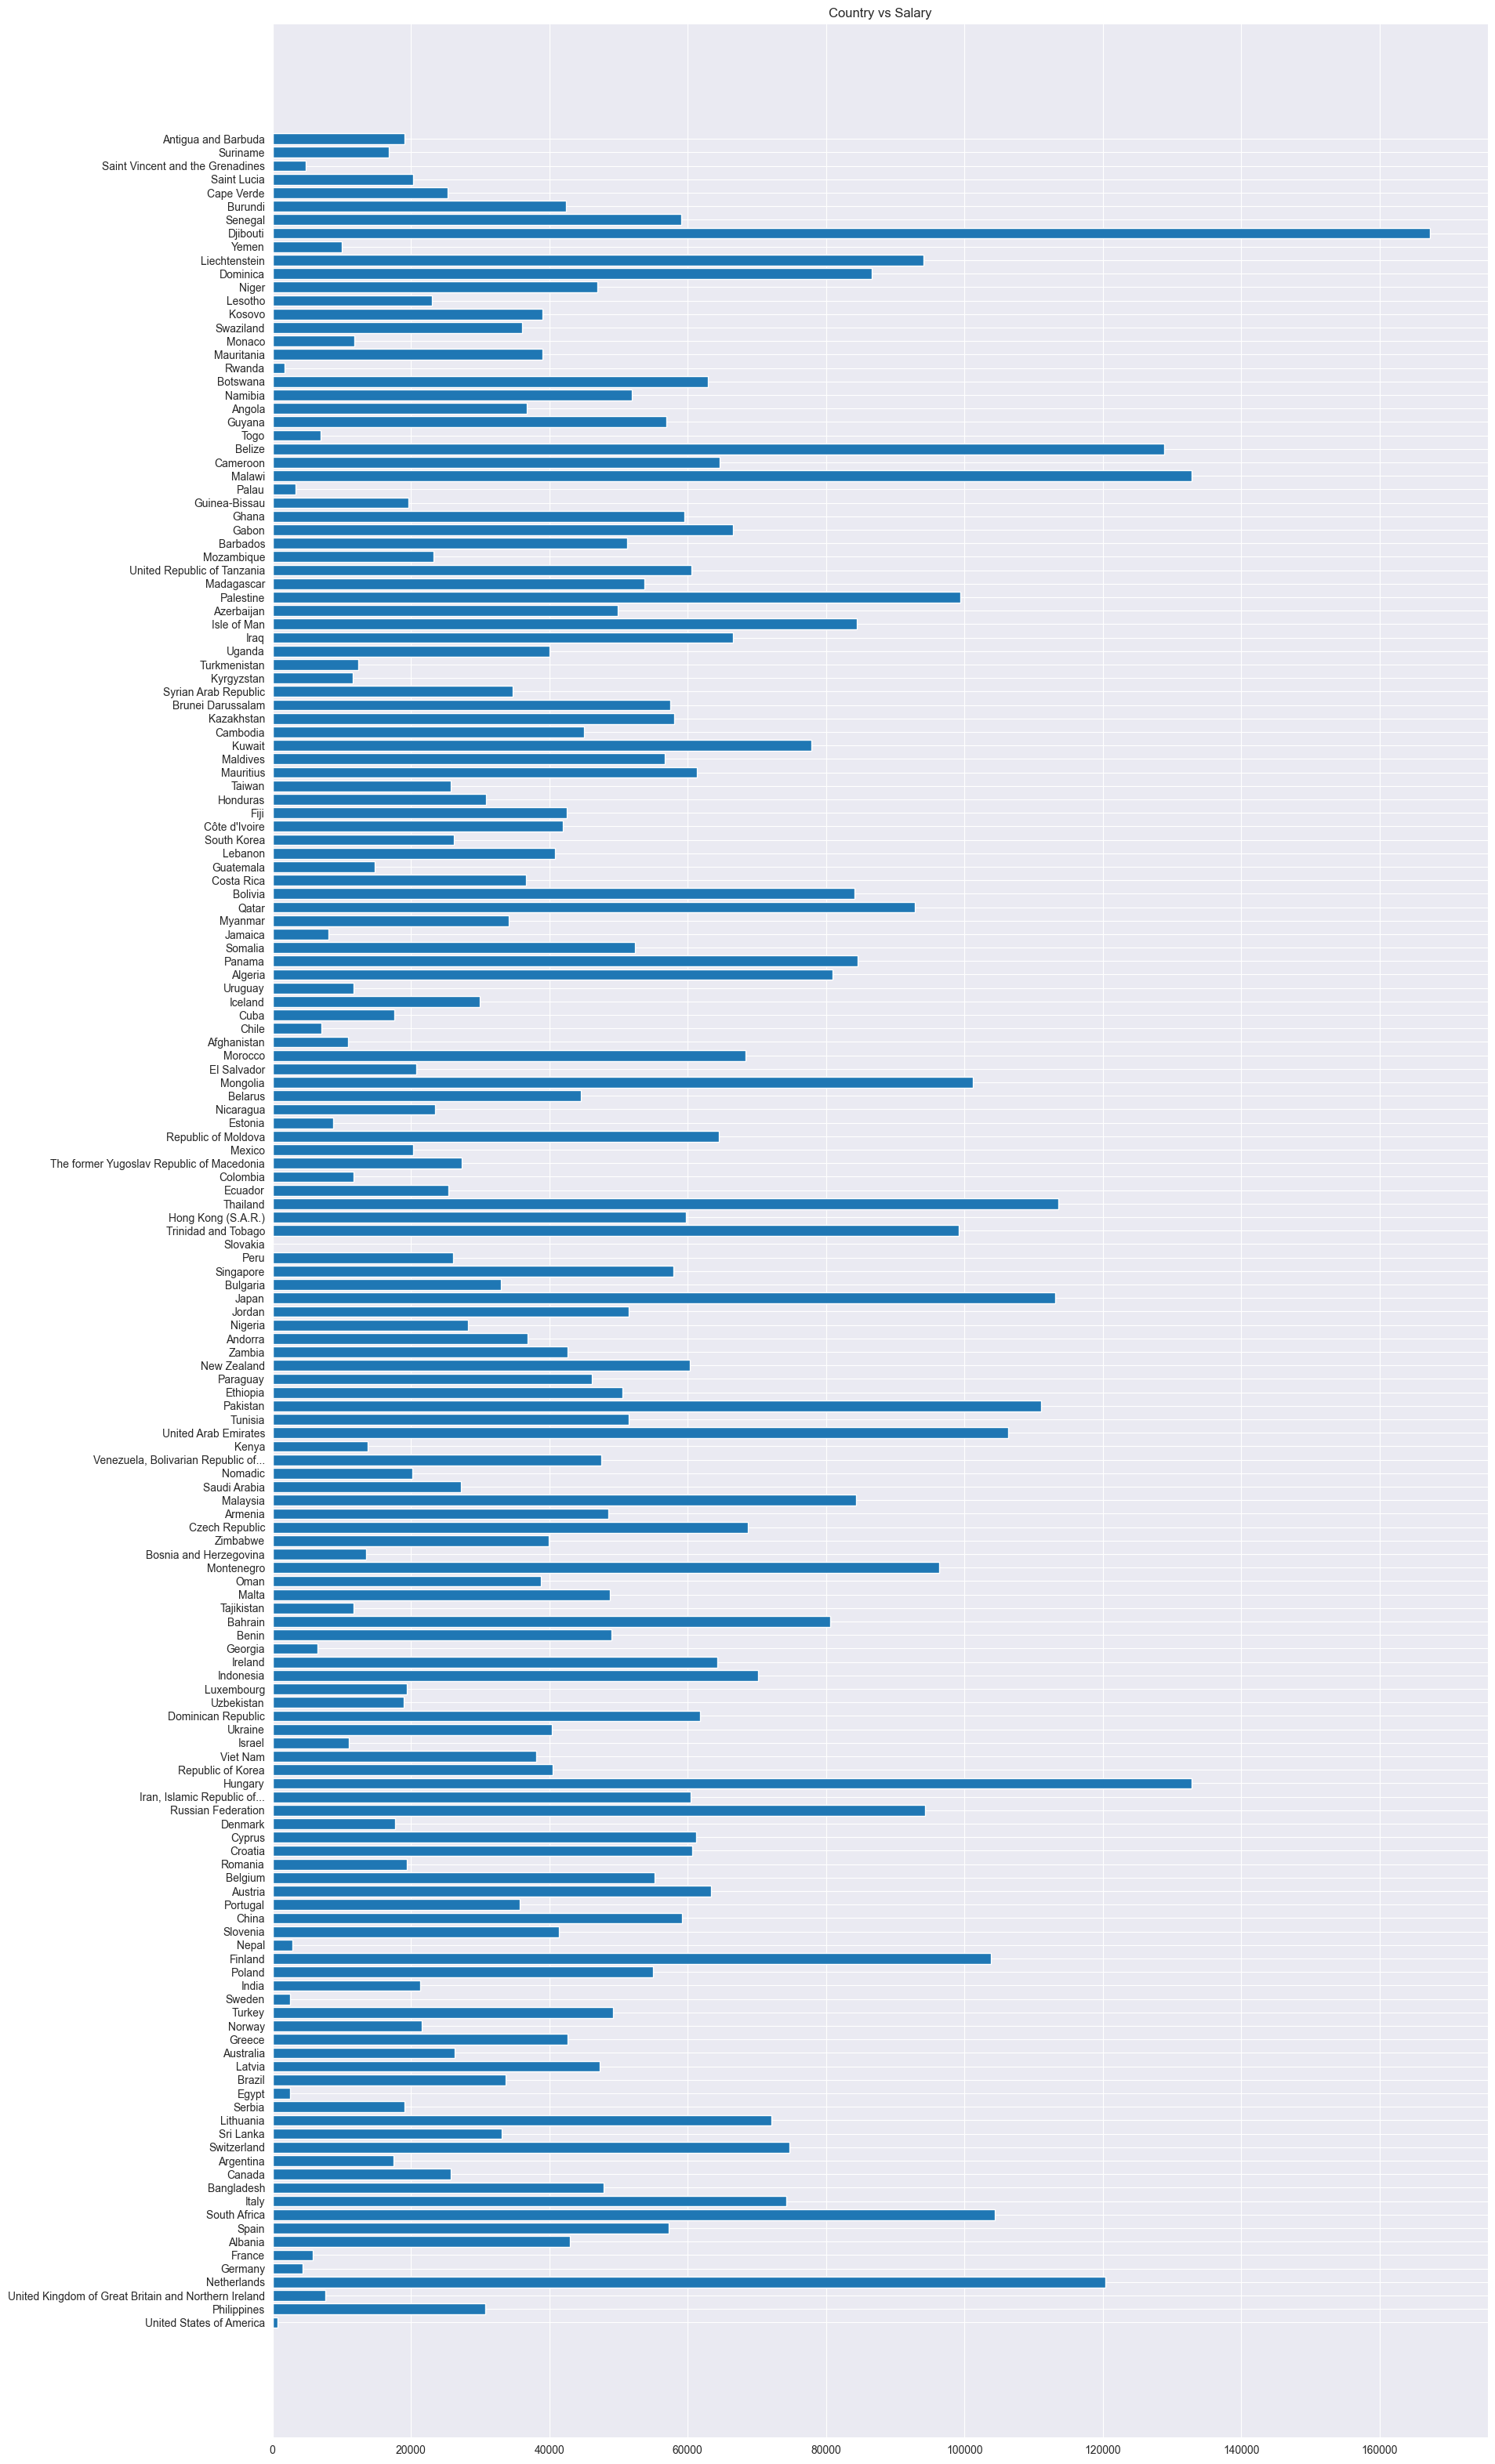

In [294]:
ShowPlot(df, 'Country', 'Salary', 20, 40)

Прогнозування заробітної плати за стажем роботи за допомогою лінійної регресії

In [295]:
X = df_mod.loc[:, df_mod.columns != 'Salary']
Y = df_mod['Salary']

In [296]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[-0.16255705, -1.00783816, -0.94881193, -0.76917202, -0.75615057],
       [ 1.31318787,  0.42709193, -0.79485564, -0.76917202, -0.75615057],
       [-0.50311357,  0.42709193, -0.64089936, -0.76917202, -0.75615057],
       ...,
       [-1.07070778, -1.00783816,  0.43679466, -0.76917202,  0.20937735],
       [-0.27607589,  0.42709193,  1.2065761 ,  0.3770907 , -0.56304499],
       [-0.27607589,  1.86202201, -0.48694307,  0.3770907 ,  0.05489289]])

In [297]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, random_state=11)

In [298]:
X_train.shape

(24402, 5)

In [299]:
X_test.shape

(8134, 5)

In [300]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, Y_train)

LinearRegression()

In [301]:
lin_reg.coef_

array([ 19725.74563634,  -8426.55904988,   4186.62781189,  -4844.47289042,
       -23133.76627173])

In [302]:
lin_reg.intercept_

np.float64(91683.81509129435)

In [303]:
predicted = lin_reg.predict(X_test)
expected = Y_test
for p, e in zip(predicted[::5], expected[::5]):
    print(f'predicted: {p:.2f}, expected: {e:.2f}')

predicted: 38825.32, expected: 26957.00
predicted: 89333.96, expected: 133000.00
predicted: 90702.20, expected: 66916.00
predicted: 181390.93, expected: 180000.00
predicted: 84617.00, expected: 70679.00
predicted: 86870.02, expected: 64254.00
predicted: 98236.11, expected: 88000.00
predicted: 126735.29, expected: 85672.00
predicted: 99410.18, expected: 66396.00
predicted: 115980.19, expected: 74963.00
predicted: 125252.00, expected: 415000.00
predicted: 96107.29, expected: 167060.00
predicted: 89786.30, expected: 111724.00
predicted: 128610.49, expected: 128507.00
predicted: 64184.80, expected: 10225.00
predicted: 108810.12, expected: 92508.00
predicted: 108773.51, expected: 280000.00
predicted: 146453.67, expected: 375000.00
predicted: 72691.55, expected: 42836.00
predicted: 87998.48, expected: 46049.00
predicted: 132603.28, expected: 84761.00
predicted: 86187.38, expected: 50675.00
predicted: 101734.36, expected: 68276.00
predicted: 43316.89, expected: 5199.00
predicted: 81223.13, ex

Обчислення середньоквадратичної похибки

In [304]:
mean_squared_error(Y_test, predicted)

5122917656.599939

Обчислення R^2

In [305]:
r2_score(Y_test, predicted)

0.18842711892353925

In [306]:
plt.rcParams['figure.figsize'] = [10, 5]

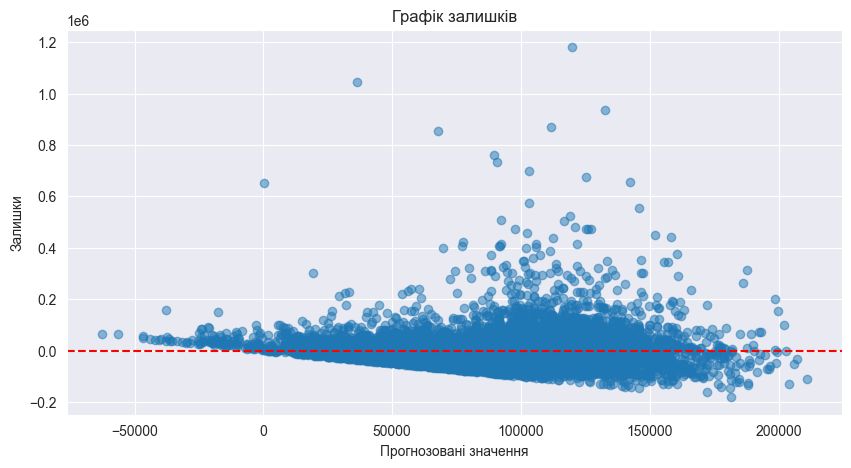

In [307]:
residuals = Y_test - predicted
plt.scatter(predicted, residuals, alpha=0.5)
plt.xlabel('Прогнозовані значення')
plt.ylabel('Залишки')
plt.title('Графік залишків')
plt.axhline(y=0, color='red', linestyle='--')
plt.show()

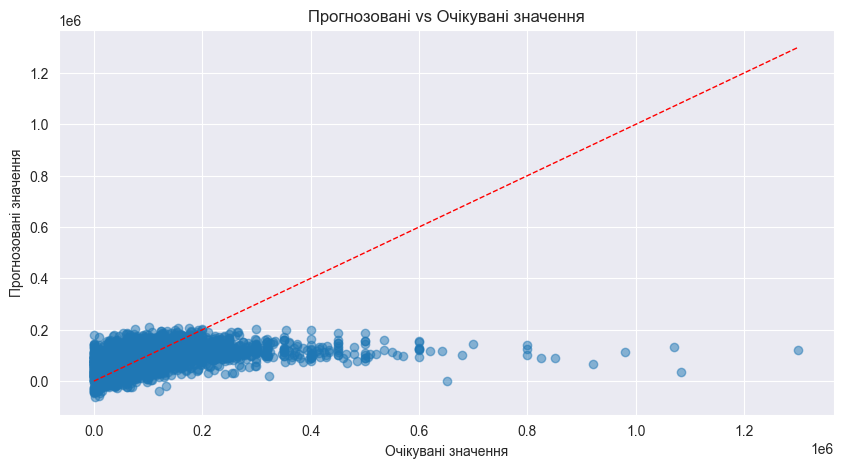

In [308]:
plt.scatter(Y_test, predicted, alpha=0.5)
plt.xlabel('Очікувані значення')
plt.ylabel('Прогнозовані значення')
plt.title('Прогнозовані vs Очікувані значення')
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'r--', lw=1)
plt.show()

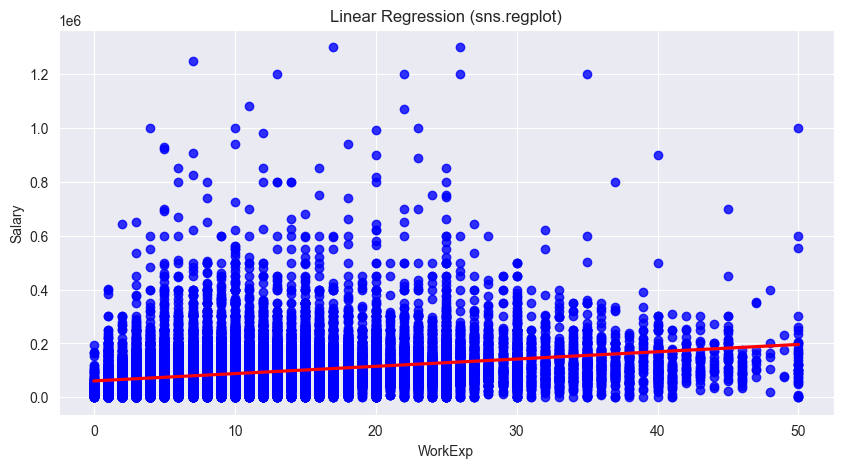

In [309]:
axes = sns.regplot(x=df_mod.WorkExp, y=df_mod.Salary, data=df_mod, scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.title("Linear Regression (sns.regplot)")
plt.show()

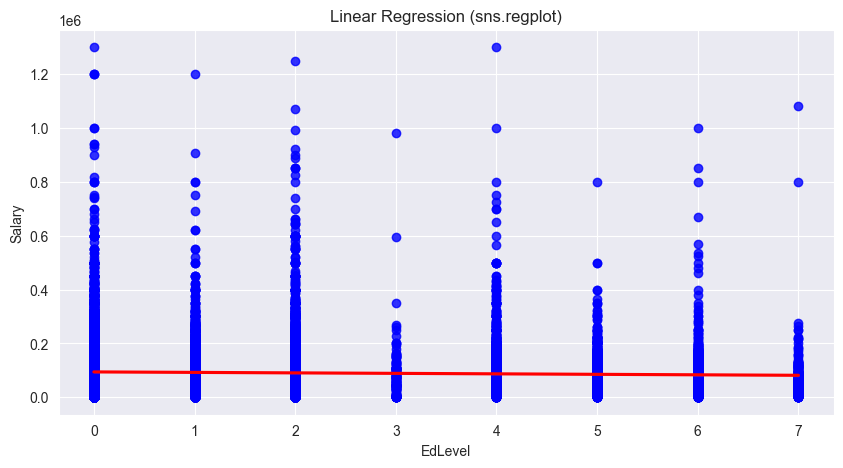

In [310]:
axes = sns.regplot(x=df_mod.EdLevel, y=df_mod.Salary, data=df_mod, scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.title("Linear Regression (sns.regplot)")
plt.show()

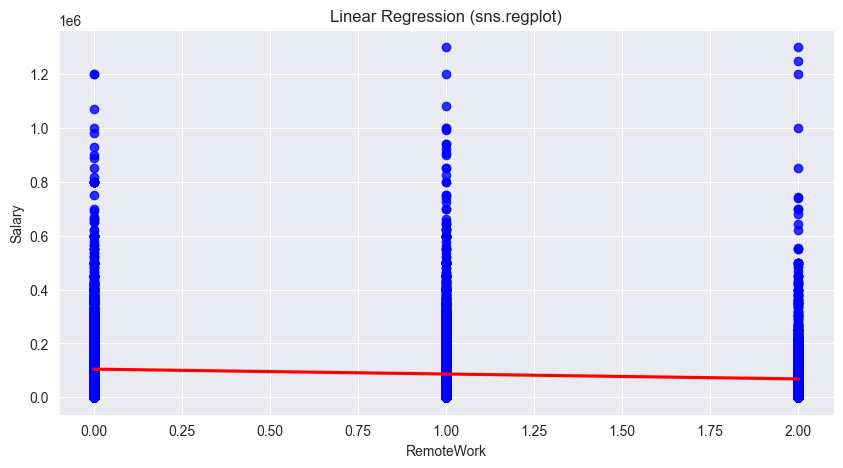

In [311]:
axes = sns.regplot(x=df_mod.RemoteWork, y=df_mod.Salary, data=df_mod, scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.title("Linear Regression (sns.regplot)")
plt.show()

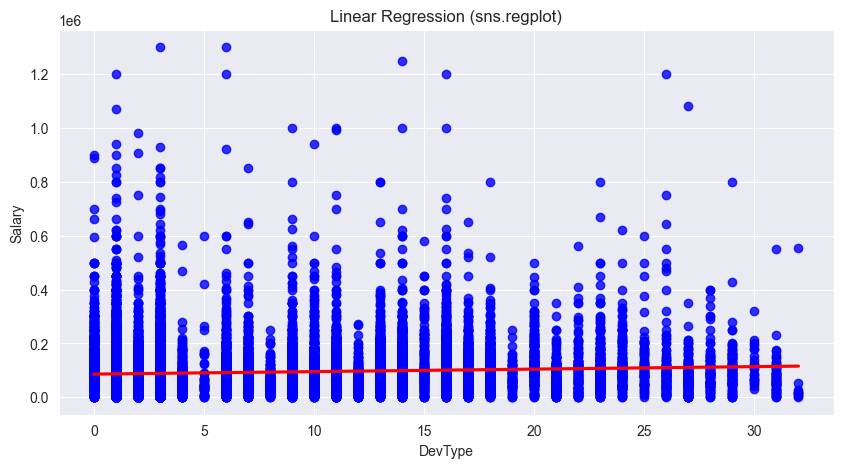

In [312]:
axes = sns.regplot(x=df_mod.DevType, y=df_mod.Salary, data=df_mod, scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.title("Linear Regression (sns.regplot)")
plt.show()

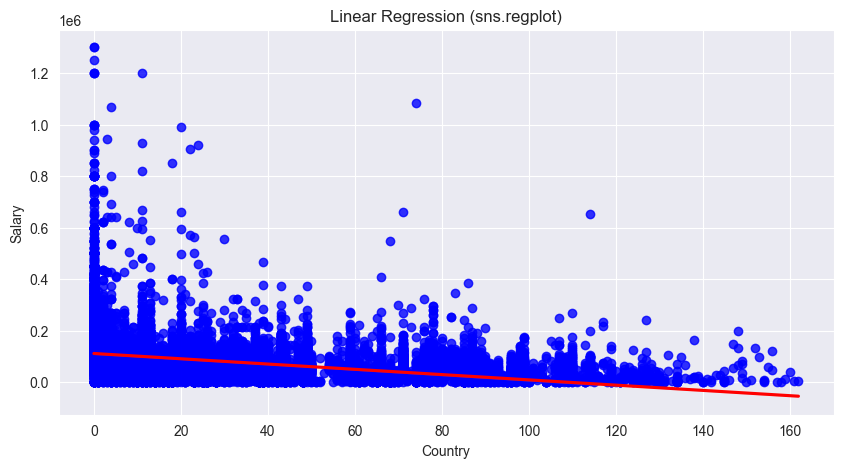

In [313]:
axes = sns.regplot(x=df_mod.Country, y=df_mod.Salary, data=df_mod, scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.title("Linear Regression (sns.regplot)")
plt.show()